Prerequisites

In [1]:
import pandas as pd
import pandas_ta
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Step 1: Load dataset into pandas DataFrame

In [2]:
df = pd.read_csv('TSLA.csv')
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,289.108428,297.288412,280.697937,289.997067,289.997067,7.530795e+07
std,167.665389,171.702889,163.350196,168.995613,168.995613,4.013706e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.735770e+07
25%,148.367996,154.990005,143.222000,149.792007,149.792007,4.713450e+07
50%,244.296005,245.600006,237.119995,241.731995,241.731995,7.025550e+07
75%,421.390015,430.500000,410.579987,421.200012,421.200012,9.454550e+07
max,699.989990,718.719971,691.119995,705.669983,705.669983,3.046940e+08


Step 2: Prepare Data

In [3]:
#Reindex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

#Drop all but Adj Close
df = df[['Adj Close']]

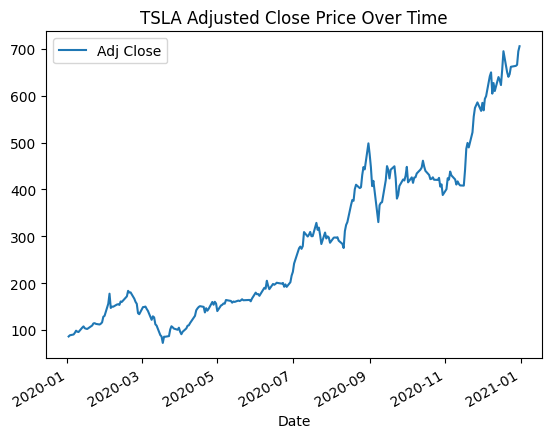

In [4]:
#Plot
ax = df.plot.line(y='Adj Close', title='TSLA Adjusted Close Price Over Time')


Step 3: Add technical indicators to use as features for the Linear Regression model

In [5]:
#Add EMA to Data Frame by appending it to Data Frame
df.ta.ema(close ='Adj Close', length=10, append = True)
df.head(15)

,Adj Close,EMA_10
Date,,
2020-01-02,86.052002,NaN
2020-01-03,88.601997,NaN
2020-01-06,90.307999,NaN
2020-01-07,93.811996,NaN
2020-01-08,98.428001,NaN
2020-01-09,96.267998,NaN
2020-01-10,95.629997,NaN
2020-01-13,104.972000,NaN
2020-01-14,107.584000,NaN


Step 4: Reshape data

In [6]:
#Drop the NaN values
df = df.iloc[10:]
print(df.head())

             Adj Close      EMA_10
Date                              
2020-01-16  102.697998   97.656035
2020-01-17  102.099998   98.464028
2020-01-21  109.440002  100.459660
2020-01-22  113.912003  102.905540
2020-01-23  114.440002  105.002715


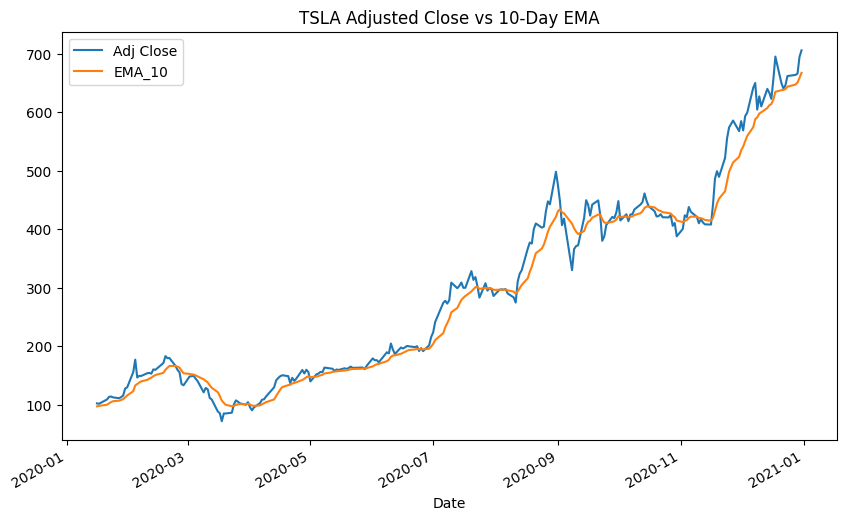

In [7]:
#Plot the new dataframe
ax = df.plot.line(title='TSLA Adjusted Close vs 10-Day EMA', figsize=(10, 6))

Step 5: Train a simple linear regression model using a 10-day exponential moving average as the predictor for future price

In [13]:
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)

#Describe the training set
print("Training Set (X_train) Description:")
print(X_train.describe())

Training Set (X_train) Description:
        Adj Close
count  194.000000
mean   301.087000
std    166.785274
min     72.244003
25%    156.099999
50%    284.932999
75%    423.232499
max    705.669983


In [14]:
#Describe the test set
print("Test Set (X_test) Description:")
print(X_test.describe())

Test Set (X_test) Description:
        Adj Close
count   49.000000
mean   285.571918
std    172.523770
min     85.505997
25%    146.421997
50%    241.731995
75%    413.980011
max    663.690002


In [15]:
#Create regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

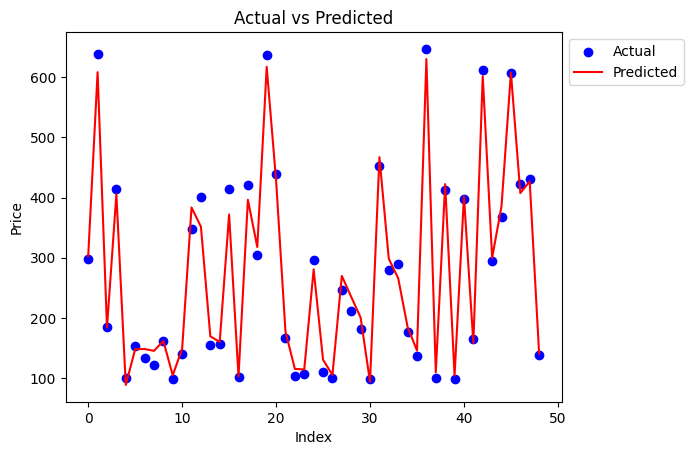

In [18]:
#Plot the actual vs predicted
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #My legend was covering my graph so had to place it outside the graph
plt.show()

Step 6: Validate the model

In [19]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test,y_pred))

Model Coefficients: [[0.93729976]]
Mean Absolute Error: 13.415119145787559
Coefficient of Determination: 0.9896175659268934
